In [157]:
import pandas as pd
from IPython.core.pylabtools import figsize
from gmpy2 import random_state
from nltk import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn import preprocessing, tree
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree  import DecisionTreeClassifier
import matplotlib.pyplot as plt


In [158]:
digits = load_digits()
digits_df = pd.DataFrame(digits.data)
digits_df["target"] = digits.target


digits_df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [159]:
# Dataframe description
digits_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [160]:
# Check for missing values
digits_df.isna().sum

<bound method DataFrame.sum of           0      1      2      3      4      5      6      7      8      9  \
0     False  False  False  False  False  False  False  False  False  False   
1     False  False  False  False  False  False  False  False  False  False   
2     False  False  False  False  False  False  False  False  False  False   
3     False  False  False  False  False  False  False  False  False  False   
4     False  False  False  False  False  False  False  False  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1792  False  False  False  False  False  False  False  False  False  False   
1793  False  False  False  False  False  False  False  False  False  False   
1794  False  False  False  False  False  False  False  False  False  False   
1795  False  False  False  False  False  False  False  False  False  False   
1796  False  False  False  False  False  False  False  False  False  False   

      ...     55     56     57  

In [161]:
# Check for duplicates
digits_df.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
1792    False
1793    False
1794    False
1795    False
1796    False
Length: 1797, dtype: bool>

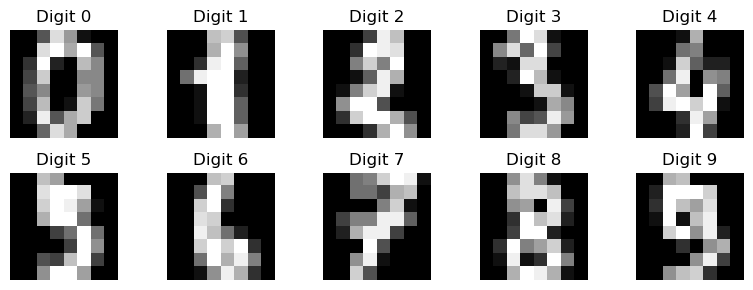

In [162]:
X = digits_df.drop(columns=["target"])
images = digits.images
y = digits_df["target"]

fig, axes = plt.subplots(2,5, figsize=(8,3))
for i, ax in enumerate(axes.ravel()):
    idx = (y.values == i).nonzero()[0][0]
    ax.imshow(images[idx], cmap = 'gray')
    ax.set_title(f"Digit {i}")
    ax.axis("off")
plt.tight_layout()



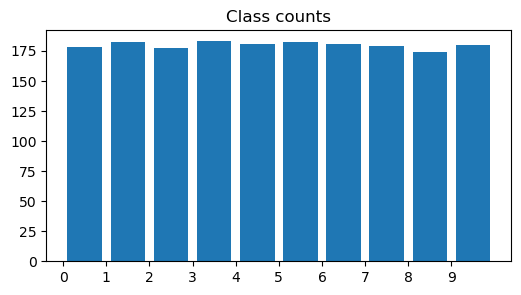

In [163]:
# Class distribution
plt.figure(figsize=(6,3))
plt.hist(y, bins=range(11), rwidth=0.8)
plt.xticks(range(10))
plt.title("Class counts")
plt.show()

### Splitting Data into Training and Test Sets, and Scaling

In [164]:

# 70 % for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.3)

# Scaling
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 1. SVM

In [165]:
# Fit training data with default support vector machine
svm_clf= SVC(random_state=42)
svm_clf.fit(X_train_scaled, y_train)

y_train_pred = svm_clf.predict(X_train_scaled)
svm_train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = svm_clf.predict(X_test_scaled)
svm_test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {svm_train_accuracy: .4f}")
print(f"Testing accuracy: {svm_test_accuracy: .4f}")

Training accuracy:  0.9976
Testing accuracy:  0.9796


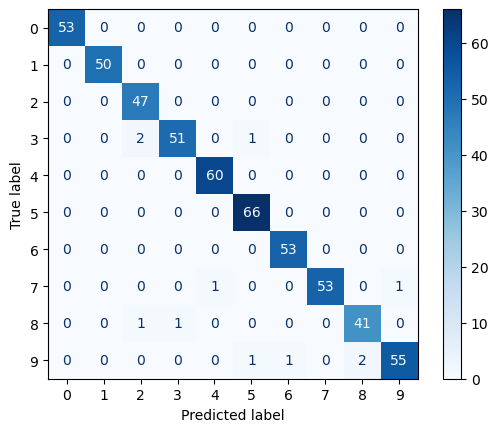

In [166]:
# Confusion matrix with test data

# ConfusionMatrixDisplay.from_estimator(svm_clf, X_test_scaled, y_test, cmap="Blues")
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, cmap='Blues')

With default parameters, the support vector machine achieves high training accuracy that drops slightly on the test set. Digits 9, 3, 8, and 7 are each misclassified at a modest rate by the model.

In [167]:
pipe = make_pipeline(SVC(kernel='rbf'))
param_grid = {
    'svc__C' : [0.01, 0.1, 1, 10, 100],
    'svc__gamma': ['scale', 1e-3, 1e-2, 1e-1, 1, 10]
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(pipe, param_grid=param_grid, cv=cv, n_jobs=-1, scoring='accuracy')

grid.fit(X_train_scaled, y_train)
print(f"Best params: {grid.best_params_}")
print(f"CV score: {grid.best_score_: .4f}")
best_model = grid.best_estimator_

Best params: {'svc__C': 10, 'svc__gamma': 'scale'}
CV score:  0.9841


Test accuracy after tuning:  0.9796


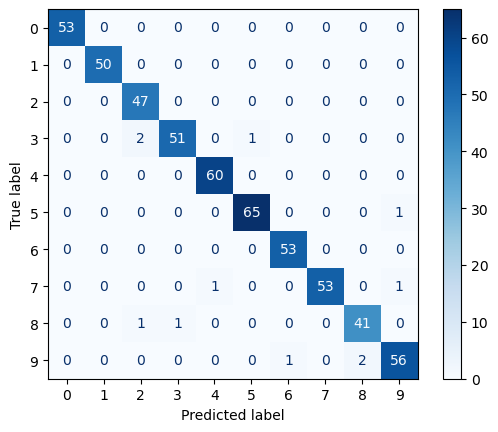

In [168]:
y_best_svm_pred = best_model.predict(X_test_scaled)

best_model_accuracy = accuracy_score(y_test, y_best_svm_pred)
print(f"Test accuracy after tuning: {best_model_accuracy: .4f}")
ConfusionMatrixDisplay.from_predictions(y_test, y_best_svm_pred, cmap="Blues")

Decision Classification

In [169]:
clf = DecisionTreeClassifier(random_state=42)


path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities # Effective alphas of subtree during pruning.,Sum of the impurities of the subtree leaves for the corresponding alpha value in

Text(0.5, 1.0, 'Total Impurity vs effective alpha with training set')

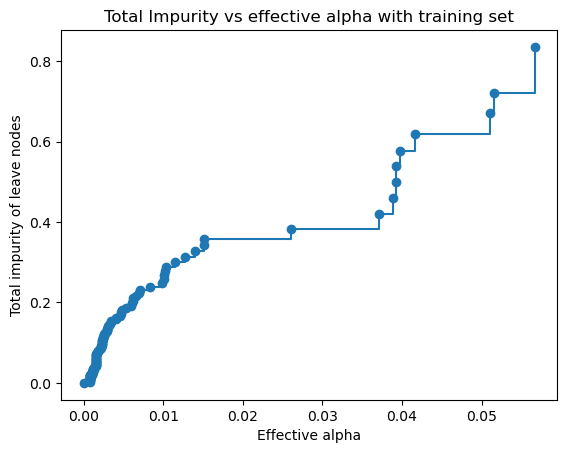

In [170]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Total impurity of leave nodes")
ax.set_title("Total Impurity vs effective alpha with training set")

In [171]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.06426214433666388


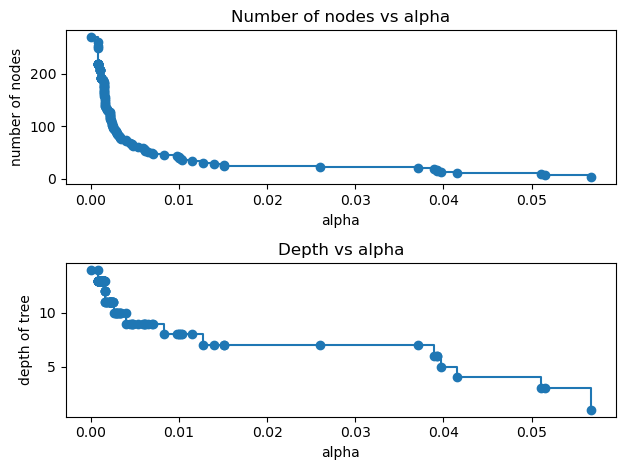

In [172]:
clfs = clfs[:-1] # remove the last tree since it only has 1 node
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

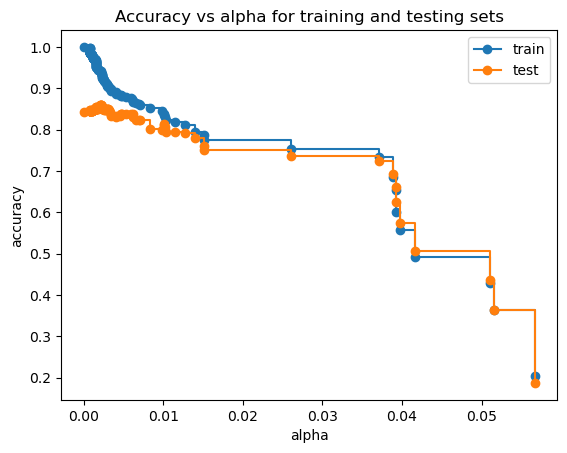

In [173]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

When alpha = 0, the tree is overfitting, accuracy is 1 with training data. With testing data it starts at 0.85 As alpha increases, over-pruning reduces both training and testing accuracy.